In [15]:
import cv2
from diffraction_subfunctions import diffraction_to_azimuthal_avg
from diffraction_subfunctions import sms_to_mrdf
import numpy as np
import matplotlib.pyplot as plt
import os

In [16]:
plt.style.use('./plot_style_mk.mplstyle')

In [17]:
xcen = 391.55 #center of the diffraction
ycen = 393.03 #center of the diffraction

folder = r'\\win.desy.de\home\kayanatm\My Documents\GitHub\Electron-diffraction\Gas and Liquid_diffraction_files'
files = []

for root, dirs, _files in os.walk(folder):
    files.extend(_files)
files

['Gas_diffint_1D.txt',
 'Iatom_gly_liq.png',
 'Iatom_gly_simulated_kirk_gas.png',
 'Iatom_gly_simulated_kirk_gas_1D.txt',
 'Imol_gly_liq.png',
 'Imol_gly_simulated_kirk_gas.png',
 'Imol_gly_simulated_kirk_gas_1D.txt',
 'Itot_gly_liq.png',
 'Itot_gly_simulated_kirk_gas.png',
 'Liq_diffint_1D.txt']

In [18]:
import pandas as pd
df_gas = pd.read_csv(os.path.join(folder, files[0]), sep='\s+')

s_gas = df_gas['s'].to_numpy()
Iatom_gas = df_gas['Iatom'].to_numpy()
Imol_gas = df_gas['Imol'].to_numpy()

df_gas

,s,Iatom,Imol
0,0.020142,254.957210,254.695900
1,0.060427,254.802110,253.595540
2,0.100712,254.492870,251.411740
3,0.140997,254.030430,248.170260
4,0.181282,253.416050,243.908450
...,...,...,...
195,7.875704,5.196025,-0.043425
196,7.915989,5.103710,-0.041502
197,7.956274,5.013761,-0.039221
198,7.996559,4.926911,-0.036619


In [19]:
df_liq = pd.read_csv(os.path.join(folder, files[-1]), sep='\s+')

s_liq = df_liq['s'].to_numpy()
Iatom_liq = df_liq['Iatom'].to_numpy()
Imol_liq = df_liq['Imol'].to_numpy()

df_liq

,s,Iatom,Imol
0,0.020142,254.957210,228.537570
1,0.060427,254.802100,153.559600
2,0.100712,254.492870,67.239610
3,0.140997,254.030430,18.400494
4,0.181282,253.416030,3.941112
...,...,...,...
195,7.875704,5.195892,-0.000060
196,7.915989,5.103579,-0.000053
197,7.956274,5.013632,-0.000054
198,7.996559,4.926784,-0.000064


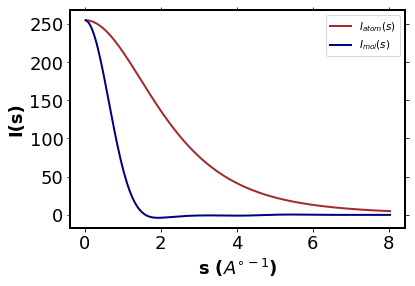

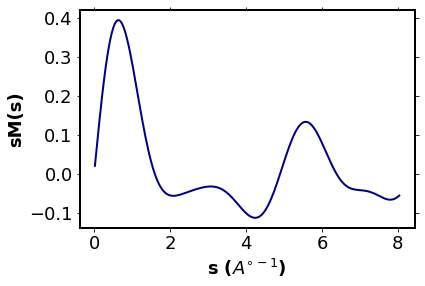

In [69]:
sMs_gas = np.multiply(s_gas, np.divide(Imol_gas, Iatom_gas))

fig1, ax1 = plt.subplots()
ax1.plot(s_gas, Iatom_gas, label = '$I_{atom}(s)$', color = 'brown', lw = 2)
ax1.plot(s_gas, Imol_gas, label = '$I_{mol}(s)$', color = 'navy', lw = 2)
ax1.set_xlabel('s ($A^{\circ-1}$)')
ax1.set_ylabel('I(s)')
ax1.legend(fontsize = 'xx-small', loc=1)
fig1.savefig('Iatom_and_Imol_Glycerol_gas.pdf', bbox_inches = 'tight')

fig2, ax2 = plt.subplots()
ax2.plot(s_gas, sMs_gas, color = 'navy', lw = 2)
ax2.set_xlabel('s ($A^{\circ-1}$)')
ax2.set_ylabel('sM(s)')
fig2.savefig('sMs_Glycerol_gas.pdf', bbox_inches = 'tight')

Text(0, 0.5, 'sM(s)')

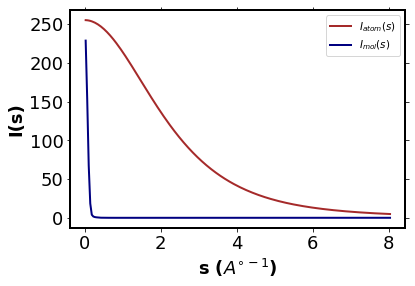

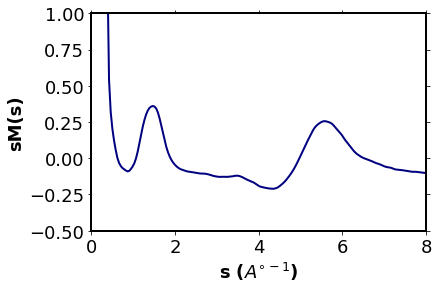

In [61]:
sMs_liq = np.multiply(s_liq, np.divide(Imol_liq, Iatom_liq))*1000
from scipy.signal import savgol_filter
sMs_liq_smooth = savgol_filter(sMs_liq, window_length=13, polyorder=1)

fig3, ax3 = plt.subplots()
ax3.plot(s_liq, Iatom_liq, label = '$I_{atom}(s)$', color = 'brown', lw = 2)
ax3.plot(s_liq, Imol_liq, label = '$I_{mol}(s)$', color = 'navy', lw = 2)
ax3.set_xlabel('s ($A^{\circ-1}$)')
ax3.set_ylabel('I(s)')
ax3.legend(fontsize = 'xx-small', loc=1)
fig1.savefig('Iatom_and_Imol_Glycerol_gas.pdf', bbox_inches = 'tight')

fig4, ax4 = plt.subplots()
#plt.scatter(s_liq, sMs_liq, color = 'navy')
ax4.plot(s_liq, sMs_liq_smooth, color = 'navy', lw = 2)
ax4.set_xlim([0,8])
ax4.set_ylim([-0.5,1])
ax4.set_xlabel('s ($A^{\circ-1}$)')
ax4.set_ylabel('sM(s)')

Text(0, 0.5, 'g(r)')

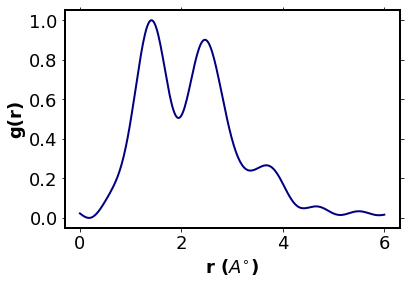

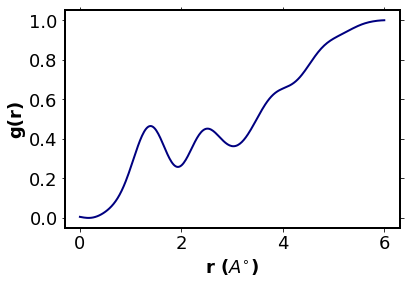

In [70]:
r_liq, mrdf_liq = sms_to_mrdf(s_liq, sMs_liq)
r_gas, mrdf_gas = sms_to_mrdf(s_gas, sMs_gas)
from diffraction_subfunctions import normalize

mrdf_liq = normalize(mrdf_liq) #mrdf_liq / np.linalg.norm(mrdf_liq)

mrdf_gas = normalize(mrdf_gas) #mrdf_gas / np.linalg.norm(mrdf_gas)

fig5, ax5 = plt.subplots()
ax5.plot(r_gas, mrdf_gas, color = 'navy', lw = 2)
ax5.set_xlabel('r ($A^{\circ}$)')
ax5.set_ylabel('g(r)')
fig5.savefig('g(r)_Glycerol_gas.pdf', bbox_inches = 'tight')

fig6, ax6 = plt.subplots()
ax6.plot(r_liq, mrdf_liq, color = 'navy', lw = 2)
ax6.set_xlabel('r ($A^{\circ}$)')
ax6.set_ylabel('g(r)')

In [9]:
mrdf_liq.shape

(300,)

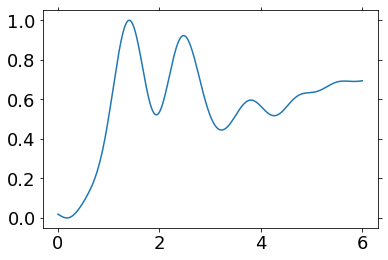

In [10]:
mix = normalize(mrdf_gas+mrdf_liq)

plt.plot(r_gas, mix)